<a href="https://colab.research.google.com/github/GithubuserZainab29/F25-MAT-1630/blob/main/Final_Lidarrrrr_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


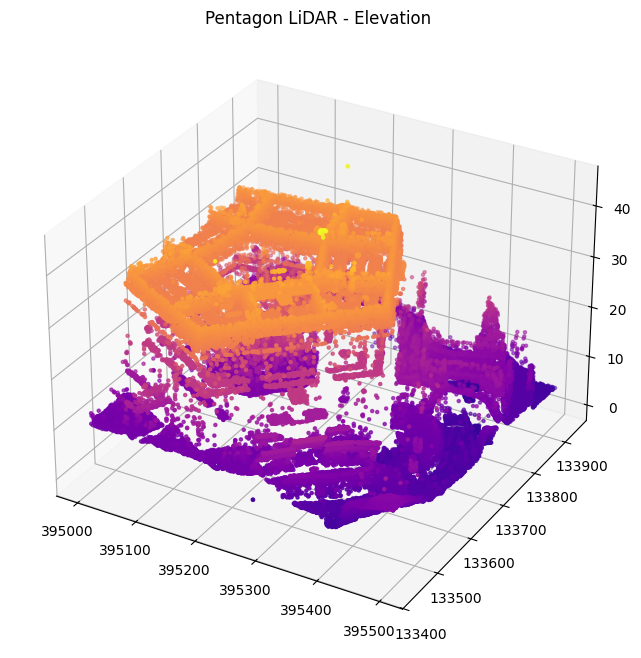

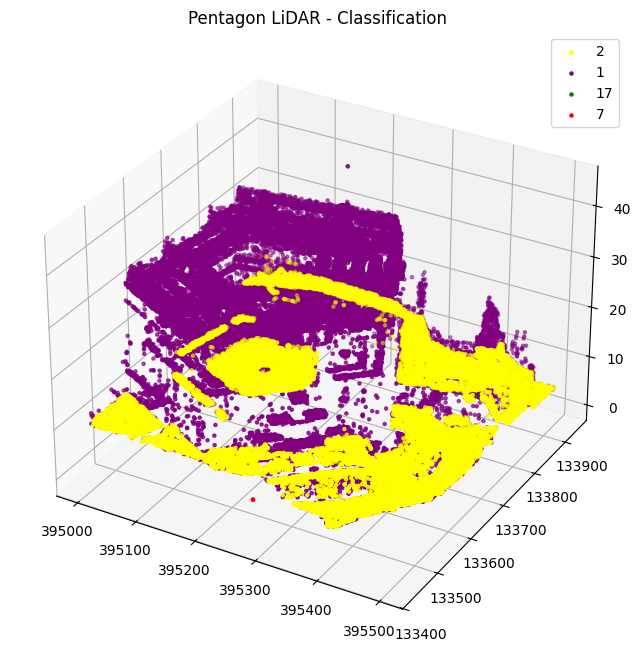

KeyError: 'XC'

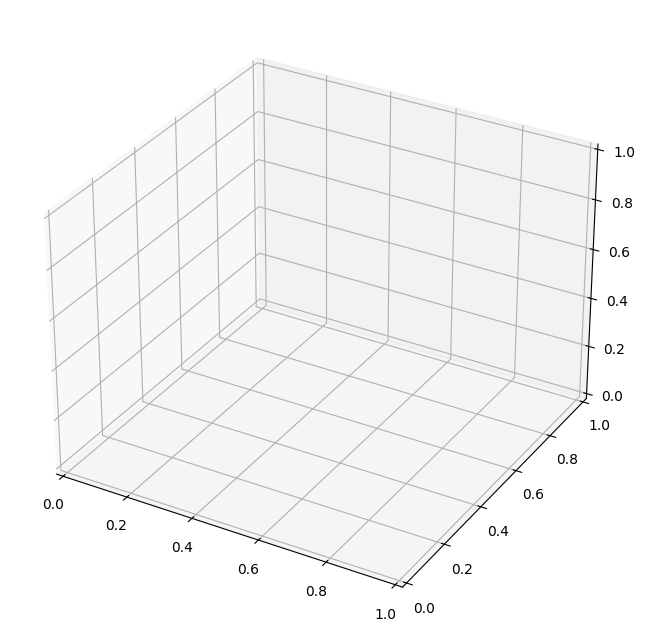

In [ ]:
from google.colab import drive   #connects google drive to google colab so i can acess the file
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA                                        #importing libraries for plotting ,scalling
                                                                              #and for data classification.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix

#QUESTION 1Plot the LiDAR data in the pentagon.txt file

pentagonfile = '/content/drive/MyDrive/Datasets/pentagon.txt'                 #pentagon lidar data from my saved drive
framedata = pd.read_csv(pentagonfile, sep=' ')                                #reads the frame data attached to mine

if framedata.shape[1] == 16:# 16 coloums
    framedata.columns = ['XC','YC','ZC','intensity','scan_angle','num_returns',
                       'return_num','classification','user_data','point_src_ID',     # 16 diffrent attributs like xyz coordinates
                       'edge','direction','R','G','B','index']                        #the number returnd , intensity and the angle to scan

sample_data_pentagon = framedata.sample(frac=0.01)  #speeds the plotting

FIGURE = plt.figure(figsize=(8,8))
AXES = FIGURE.add_subplot(111, projection='3d')
AXES.scatter(sample_data_pentagon['XC'], sample_data_pentagon['YC'],
           sample_data_pentagon['ZC'], c=sample_data_pentagon['ZC'],     #plots 3D plot of lidar
           cmap='plasma', marker='.')
AXES.set_title("Pentagon LiDAR - Elevation")
plt.show()

CLASSDATA = sample_data_pentagon['classification'].unique()
Dcolors = ['yellow', 'purple', 'green', 'red', 'blue', 'orange', 'cyan', 'magenta'] # colours of plotted graph
class_color = {cls: Dcolors[i % len(Dcolors)] for i, cls in enumerate(CLASSDATA)}

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
for cls in CLASSDATA:
    df_cls = sample_data_pentagon[sample_data_pentagon['classification'] == cls]
    ax.scatter(df_cls['XC'], df_cls['YC'], df_cls['ZC'], c=class_color[cls], label=str(cls), marker='.')
ax.set_title("Pentagon LiDAR - Classification")
ax.legend()
plt.show()                                                        # shows the data by plotting

#QUESTION 2 Which classes are represented?                  #reads data of fusa and sets the names of the coloum
file_fusa = '/content/drive/MyDrive/Datasets/fusa.h5'
DATAFRAME_fusa = pd.read_hdf(file_fusa, 'table')

if DATAFRAME_fusa.shape[1] == 16:
    DATAFRAME_fusa.columns = ['XC','YC','ZC','intensity','scan_angle','num_returns','return_num',
                       'classification','user_data','point_src_ID','edge','direction','R','G','B','index']

fusasample = DATAFRAME_fusa.sample(frac=0.5)                      #plots half of fusa data

fig = plt.figure(figsize=(8,8)) #creating a new figure with the size 8 by 8
ax = fig.add_subplot(111, projection='3d')  #adding a 3d plot subsitute
ax.scatter(fusasample['XC'], fusasample['YC'], fusasample['ZC'], c=fusasample['ZC'], cmap='plasma', marker='.')#sample designated to color
plt.show() #plotting and shows the  3d data

fusaclass = fusasample['classification'].unique() #gets unique values in classification
fusacolor = ['yellow', 'purple', 'green', 'red', 'blue', 'orange', 'cyan', 'magenta'] #list of colors for diff classes
fusacolorclass = {cls: fusacolor[i % len(fusacolor)] for i, cls in enumerate(fusaclass)}#creating a dictionary for class for a color
#gives index and class value and the len inbuilt functions gives the lenght of colors

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
for cls in fusaclass: #using for loop for unique class in fusa
    df_cls = fusasample[fusasample['classification'] == cls]    #lable setting
    ax.scatter(df_cls['XC'], df_cls['YC'], df_cls['ZC'], c=fusacolorclass[cls], label=str(cls), marker='.')
ax.legend()
plt.show()

#QUESTION 3 Eliminate unecessary features. How many features you have now?
#i have 5 features now
X = DATAFRAME_fusa.drop(columns=['classification'])   #produce a matrix using coloum from framedata all input data
y = DATAFRAME_fusa['classification']   #cretes output data

X_std = StandardScaler().fit_transform(X) #makes mean 0 and SD 1


#QUESTION 4 PCA for dimensionality reduction
pca = PCA(n_components=2)       #produce Principal Component Analysis
X_pca2 = pca.fit_transform(X_std)

plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='plasma', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')                #plotting the class
plt.colorbar(label='Class')
plt.show()

pca5 = PCA(n_components=5)   #creates object of pca with 5 componets
X_pca5 = pca5.fit_transform(X_std) #returns new matrix till 5

plt.bar(range(1,6), pca5.explained_variance_ratio_*100)   #bar chart plotting and loop from 1 to 6 which will run till 5
plt.xlabel('PC')
plt.ylabel('Variance %')
plt.show()

# Question 5: KNN classification on PCA-reduced data

X_train, X_test, y_train, y_test = train_test_split(X_pca5, y, test_size=0.2, random_state=42) #splits the data
knn = KNeighborsClassifier(n_neighbors=10)                           #knn features
y_pred = knn.fit(X_train, y_train).predict(X_test)

print("F1 score (KNN PCA):", f1_score(y_test, y_pred, average='macro'))  #prints F1 data

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)  #prints the matrix

#confused about question 6
